In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [ ]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


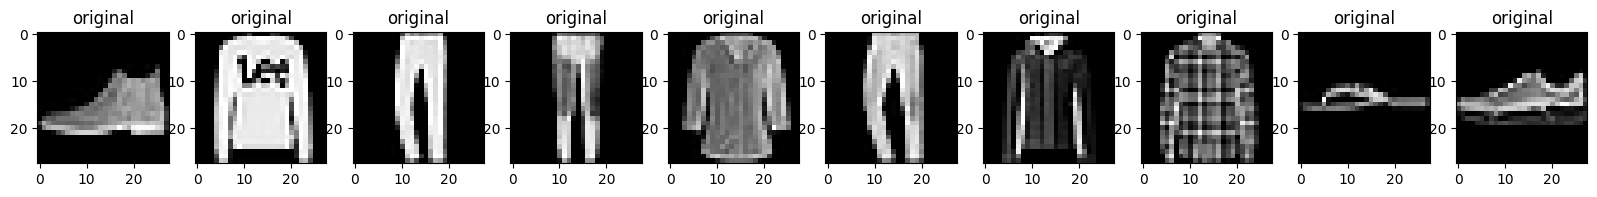

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

In [ ]:
class Vanilla_CNN(Model):
    def __init__(self):
        super(Vanilla_CNN, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
autoencoder = Vanilla_CNN()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 90s 47ms/step - loss: 0.0131 - val_loss: 0.0053
Epoch 2/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 9/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 10/10
1875/1875 [==============================] - 83s 44m

In [ ]:
autoencoder.encoder.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

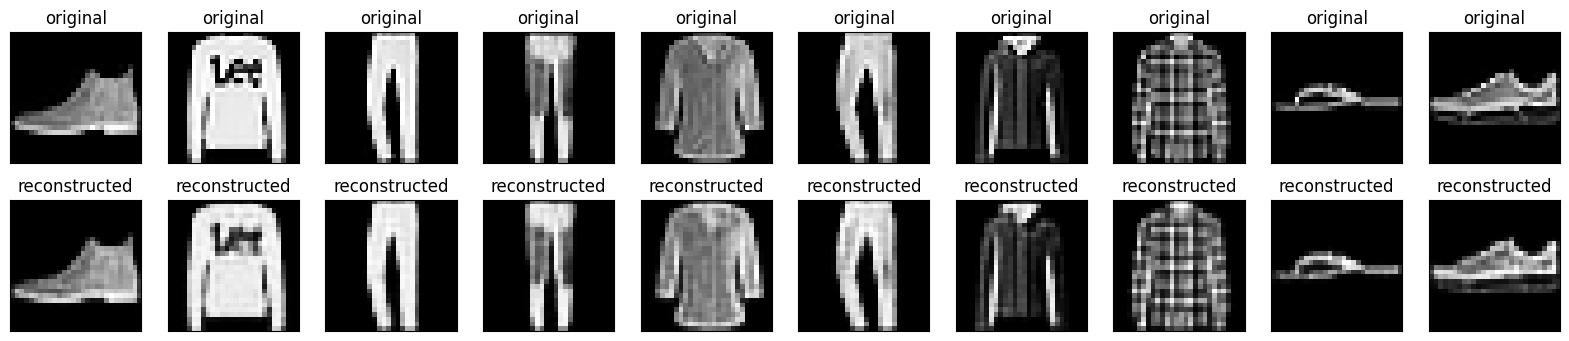

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Calculate the Mean Squared Error (MSE) loss for the test dataset
# Evaluate the autoencoder on the test dataset
mse_loss = autoencoder.evaluate(x_test, x_test)

# Print the MSE loss
print(f"Mean Squared Error (MSE) Loss on Test Dataset: {mse_loss}")



313/313 [==============================] - 3s 9ms/step - loss: 0.0021
Mean Squared Error (MSE) Loss on Test Dataset: 0.0020602073054760695


Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/10
1875/1875 [==============================] - 66s 35m

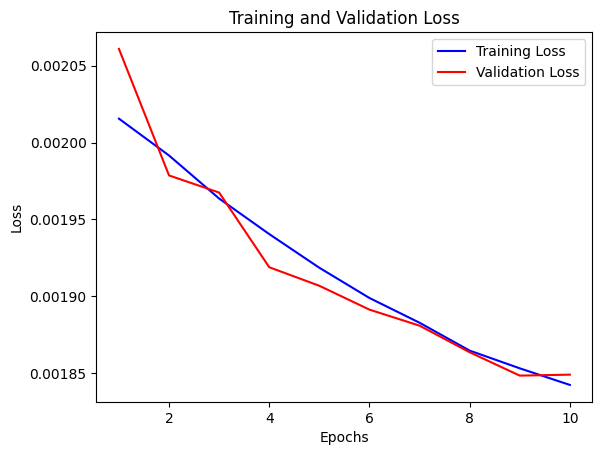

In [ ]:
import matplotlib.pyplot as plt

# Train the autoencoder and store the training history
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Extract the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epochs from 1 to the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure()
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
